# COVID-19 - EDA and Predicitons
# 
In this is study it will be presented an exploratory data analysis for covid in the world. Then, I will focus on the data from Brazil, my home country, to finish with a prediction of deaths using Linear regression.  

# Importing the libraries
In this study, we will predict the number of deaths in Brazil from COVID-19 using a regression model.

- To analyse and treat data we will use: Numpy and Pandas
- To visualize data we will use: Matplotlib and Seaborn
- To create the machine learning model we will use and statistics: Sklearn

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# EDA - Exploratory Data Analysis

## Covid-19

In [2]:
covid = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [3]:
covid.shape

(116805, 8)

In [4]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


This dataset contains the dates, locations and registers of confirmed cases, deaths and recovered patients. We will filter for Brazil to visualize the status in September 2020. 

In [5]:
df_brazil = covid[covid['Country/Region'] == 'Brazil']
df_brazil.shape

(3533, 8)

In [6]:
df_brazil.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
2903,2904,03/01/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
3032,3033,03/02/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
3173,3174,03/03/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
3322,3323,03/04/2020,NaN,Brazil,2020-03-04T20:33:02,4.0,0.0,0.0
3486,3487,03/05/2020,NaN,Brazil,2020-03-04T20:33:02,4.0,0.0,0.0


In [7]:
df_brazil.to_csv('covid_19_data_brazil.csv')
df_brazil = pd.read_csv('covid_19_data_brazil.csv')
df_brazil.head()

,Unnamed: 0,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
1,2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2,2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
3,2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
4,2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0


### Cleaning the dataframe from unnecessary data and NAN. 

There is no provincial/state data, so we will drop this column

In [8]:
df_brazil.dtypes

Unnamed: 0           int64
SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [10]:
df_brazil.isnull().sum()

Unnamed: 0          0
SNo                 0
ObservationDate     0
Province/State     85
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

It is necessary to convert ObservationDate to datetime (it is an object)

In [14]:
df_brazil['ObservationDate'] = pd.to_datetime(df_brazil['ObservationDate'])
df_brazil.dtypes

Unnamed: 0                  int64
SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

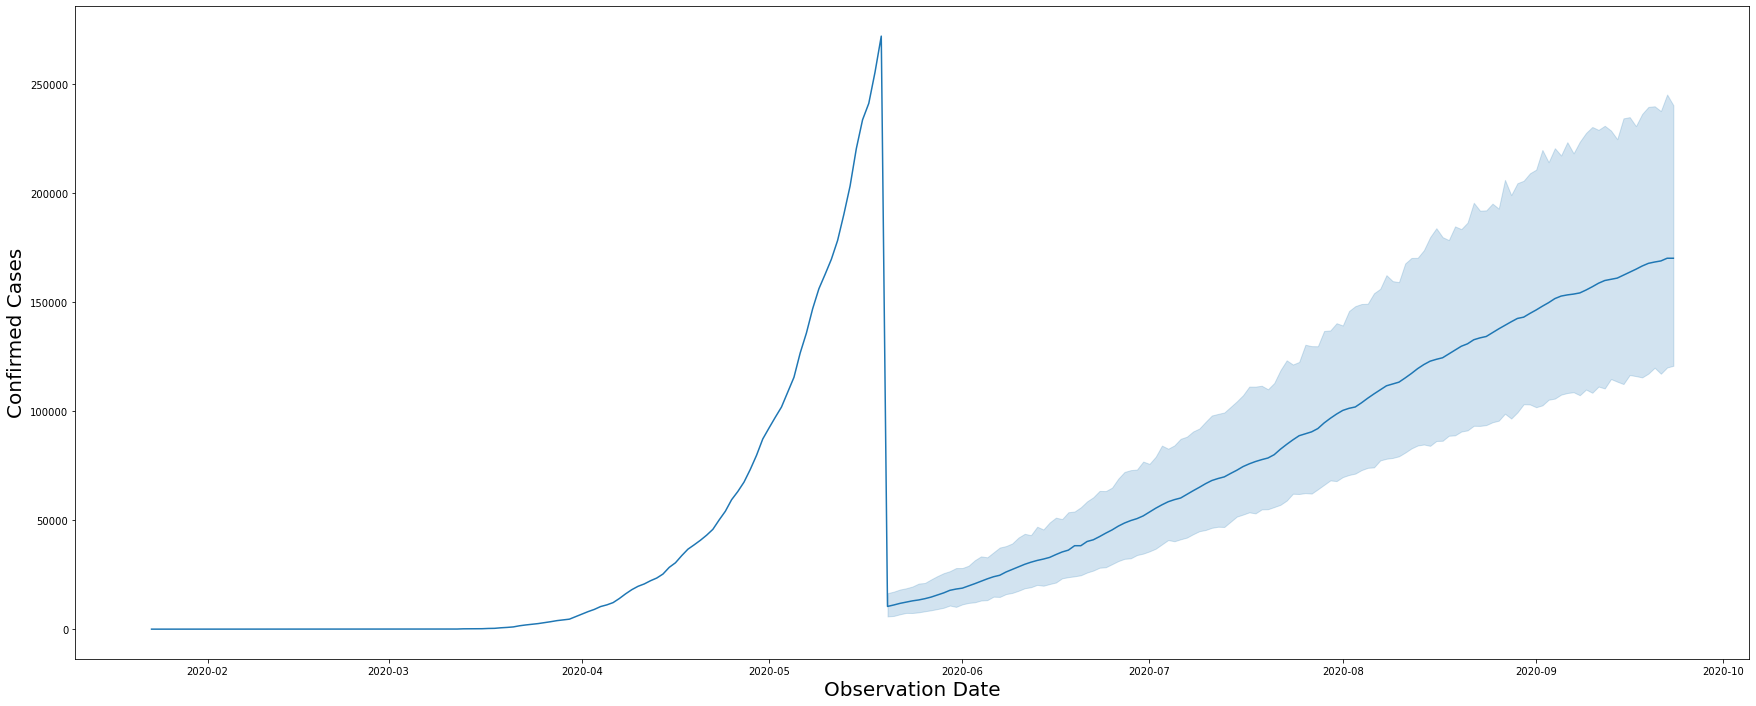

In [25]:
#Visualizing the data:
plt.figure(figsize=(30, 12))
sns.lineplot(data=df_brazil, x=df_brazil['ObservationDate'], y=df_brazil['Confirmed'])
plt.xlabel('Observation Date', fontsize = 20)
plt.ylabel('Confirmed Cases', fontsize=20);

In [26]:
#Grouping the data per day for confirmed cases, deaths and recovered cases
df_sum = df_brazil.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

In [27]:
df_sum.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-23,0.0,0.0,0.0
1,2020-02-26,1.0,0.0,0.0
2,2020-02-27,1.0,0.0,0.0
3,2020-02-28,1.0,0.0,0.0
4,2020-02-29,2.0,0.0,0.0


In [28]:
df_sum.tail()

,ObservationDate,Confirmed,Deaths,Recovered
207,2020-09-19,4528240.0,136532.0,3936893.0
208,2020-09-20,4544629.0,136895.0,3963446.0
209,2020-09-21,4558040.0,137272.0,3993432.0
210,2020-09-22,4591364.0,138105.0,4016831.0
211,2020-09-23,4591364.0,138105.0,4046827.0


In [37]:
plt.figure(figsize=(22, 8))
plt.stackplot(df_sum['ObservationDate'], [df_sum['Confirmed'], df_sum['Deaths'], df_sum['Recovered']],
              labels = ['Confirmed Cases', 'Deaths', 'Recovered'])
plt.legend(loc = 'upper left', fontsize=15)
plt.xlabel('Observation Date', fontsize = 16)
plt.ylabel('Total Number', fontsize=16);

TypeError: __init__() got an unexpected keyword argument 'fontsize'

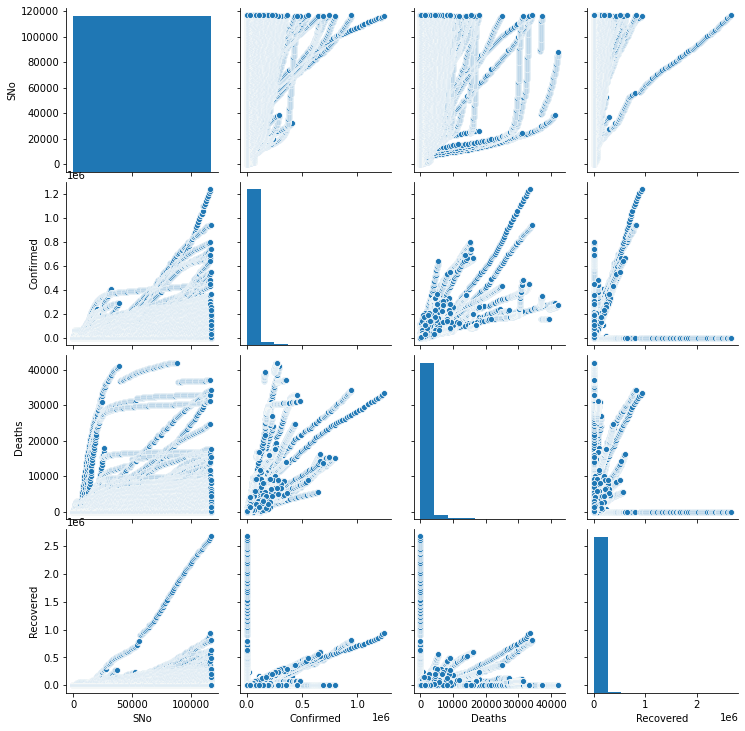

In [30]:
#To see bivariate distributions in a dataset
sns.pairplot(covid)

## Covid-19 line_list_data

In [ ]:
line_list_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')

In [ ]:
line_list_df.shape

In [ ]:
line_list_df.dtypes

In [ ]:
line_list_df.head(5)

In [ ]:
#Visualizing all symptoms reported
symp = line_list_df['symptom'].unique()

#Creating a dataframe
df_symp = pd.DataFrame(symp)
df_symp.shape

In [ ]:
#Checking the variable 'age' before plotting the data
line_list_df['age'].isnull().values.sum()

In [ ]:
#Dropping the NAN values from 'age' and converting ages into integers
line_list_df['age'] = line_list_df['age'].dropna().astype(int)

In [ ]:
sns.distplot(line_list_df['age'])



# Death Prediction from COVID-19 for Brazil

## Preparing the dataset

In [ ]:
deaths_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')

In [ ]:
deaths_df.shape

In [ ]:
deaths_df.head()

In [ ]:
deaths_df.tail()

In [ ]:
#Filtering the data for Brazil: 

deaths_df[deaths_df['Country/Region'] == 'Brazil']

In [ ]:
columns = deaths_df.keys()
columns

#### This database has a start date 22nd January 2020 and end date 23rd o September 2020. 

In [ ]:
deaths_df = deaths_df.loc[:, columns[4]:columns[-1]]

In [ ]:
deaths_df.head()

In [ ]:
deaths_df.keys()

In [ ]:
len(deaths_df.keys())

In [ ]:
#Sum of death cases for 22nd of January - the first day on the dataset
deaths_df['1/22/20'].sum()

In [ ]:
#Sum of death cases for 23rd of September - the last day on the dataset
deaths_df['9/23/20'].sum()

In [ ]:
dates = deaths_df.keys()
y = []
for i in dates:
  #print(i)
  y.append(deaths_df[i].sum())

In [ ]:
#Visualizing the sum of death cases per day from January to September
print(y)

In [ ]:
#Preparing the dataset for the machine learning model
y = np.array(y).reshape(-1,1)

In [ ]:
y.shape

In [ ]:
print(y)

In [ ]:
X = np.arange(len(dates)).reshape(-1,1)

In [ ]:
X.shape

In [ ]:
print(X)

In [ ]:
forecast = np.arange(len(dates) + 10).reshape(-1,1)

In [ ]:
forecast.shape

In [ ]:
print(forecast)

In [ ]:
#Separating train and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)

#### Checking the train and test shape

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

## Polynomial Regression

#### Building the model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape

In [ ]:
X_test_poly.shape

In [ ]:
X_test_poly

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

### Predictions

In [ ]:
poly_test_pred = regressor.predict(X_test_poly)
poly_test_pred

In [ ]:
y_test

Comparing the values of y_test and poly_test_predict we can see that some values were predicted right and others not so much. To have an overview of the accuracy, let's plot both data (tested and predicted) to visualize the differences:

In [ ]:
plt.plot(poly_test_pred, linestyle = 'dashed')
plt.plot(y_test)

In [ ]:
print('MAE:', mean_absolute_error(poly_test_pred, y_test))
print('MSE:', mean_squared_error(poly_test_pred, y_test))
print('RMSE:', np.sqrt(mean_absolute_error(poly_test_pred, y_test)))

In [ ]:
forecast.shape

In [ ]:
X_train_all = poly.transform(forecast)
X_train_all.shape

In [ ]:
poly_pred_all = regressor.predict(X_train_all)
len(poly_pred_all)

In [ ]:
plt.plot(forecast[:-10], y, color='red')
plt.plot(forecast, poly_pred_all, linestyle='dashed')
plt.title('Deaths of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.legend(['Death cases', 'Predictions']);